# CA16: Cutting-Edge Deep Reinforcement Learning
## Foundation Models, Neurosymbolic RL, and Future Paradigms

Welcome to the final assignment exploring the absolute frontiers of deep reinforcement learning! This comprehensive notebook covers:

### 🧠 **Core Advanced Paradigms**
- **Foundation Models in RL**: Decision Transformers, Multi-task Pre-training, In-context Learning
- **Neurosymbolic RL**: Logic-guided Policies, Interpretable Decision Making, Causal Reasoning
- **Human-AI Collaboration**: Learning from Human Feedback (RLHF), Preference Learning, Trust Modeling
- **Continual Learning**: Catastrophic Forgetting Prevention, Meta-learning, Lifelong Adaptation

### ⚡ **Advanced Computing Paradigms**
- **Quantum RL**: Quantum-enhanced Optimization, Amplitude Estimation
- **Neuromorphic Computing**: Brain-inspired Architectures, Energy-efficient Learning
- **Distributed & Federated RL**: Multi-agent Systems, Privacy-preserving Learning

### 🚀 **Real-World Deployment**
- **Production Systems**: Monitoring, A/B Testing, Scalability
- **Ethics & Safety**: Bias Detection, Value Alignment, Regulatory Compliance
- **Future Research**: Emerging Trends, Research Directions

---

**Learning Objectives**: By the end of this notebook, you will understand and implement state-of-the-art RL techniques that represent the cutting edge of AI research and the future of intelligent agents.

## 📦 Environment Setup and Configuration

This section sets up the complete environment for advanced RL experiments, including all necessary libraries and configurations for cutting-edge implementations.

In [2]:
import os
import sys
import warnings
from typing import Dict, List, Any

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Silence warnings and set styles
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Ensure CA16 package is importable when running the notebook directly (works in Jupyter)
try:
    from IPython import get_ipython
    ipy = get_ipython()
    if ipy is not None and hasattr(ipy, 'starting_dir'):
        PROJECT_ROOT = os.path.abspath(ipy.starting_dir)
    else:
        PROJECT_ROOT = os.path.abspath('.')
except Exception:
    PROJECT_ROOT = os.path.abspath('.')
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

# Foundation models
from foundation_models import (
    DecisionTransformer,
    FoundationModelTrainer,
)

# Neurosymbolic RL
from neurosymbolic import (
    NeurosymbolicAgent,
    SymbolicKnowledgeBase,
)

# Human-AI Collaboration
from human_ai_collaboration import (
    CollaborativeAgent,
)

# Continual Learning
from continual_learning import (
    ContinualLearningAgent,
)

# Advanced Computational (optional availability per environment)
try:
    from advanced_computational import QuantumInspiredRL, NeuromorphicNetwork  # type: ignore
    ADVANCED_AVAILABLE = True
except Exception:
    ADVANCED_AVAILABLE = False

# Real-world Deployment (optional availability per environment)
try:
    from real_world_deployment import ProductionRLSystem, SafetyMonitor  # type: ignore
    DEPLOYMENT_AVAILABLE = True
except Exception:
    DEPLOYMENT_AVAILABLE = False

# Environments
from environments import SymbolicGridWorld, CollaborativeGridWorld

print(f"Using torch {torch.__version__}, CUDA: {torch.cuda.is_available()}")


Using torch 2.8.0, CUDA: False


In [3]:
import torch
import numpy as np

# Foundation Models: simple forward on dummy data
state_dim, action_dim, seq_len, batch = 8, 4, 5, 2
states = torch.randn(batch, seq_len, state_dim)
actions = torch.zeros(batch, seq_len, action_dim)  # placeholder
returns_to_go = torch.randn(batch, seq_len)
timesteps = torch.arange(seq_len).unsqueeze(0).repeat(batch, 1)

try:
    dt = DecisionTransformer(state_dim=state_dim, action_dim=action_dim, model_dim=64, num_heads=4, num_layers=2)
    preds = dt(states, actions, returns_to_go, timesteps)
    print("DecisionTransformer OK:", preds.shape)
except Exception as e:
    print("DecisionTransformer error:", e)

# Neurosymbolic: build minimal KB and run one forward
try:
    kb = SymbolicKnowledgeBase()
    ns_agent = NeurosymbolicAgent(state_dim=state_dim, action_dim=action_dim, knowledge_base=kb)
    logits, values, info = ns_agent.policy(torch.randn(3, state_dim))
    print("NeurosymbolicPolicy OK:", logits.shape, values.shape)
except Exception as e:
    print("Neurosymbolic components error:", e)

# Human-AI Collaboration: forward pass
try:
    collab = CollaborativeAgent(state_dim=state_dim, action_dim=action_dim)
    a, conf = collab.select_action(torch.randn(state_dim))
    print("CollaborativeAgent OK: action=", a, "conf=", round(conf, 3))
except Exception as e:
    print("CollaborativeAgent error:", e)

# Environments: step a few times
try:
    env1 = SymbolicGridWorld(size=6)
    obs, _ = env1.reset()
    total = 0.0
    for _ in range(5):
        act = np.random.randint(0, 4)
        obs, r, done, _, _ = env1.step(act)
        total += r
        if done:
            break
    print("SymbolicGridWorld OK: steps run, total_reward=", round(float(total), 2))
except Exception as e:
    print("SymbolicGridWorld error:", e)

try:
    env2 = CollaborativeGridWorld(size=6)
    obs, _ = env2.reset()
    act = np.random.randint(0, 4)
    obs, r, done, _, _ = env2.step(act)
    print("CollaborativeGridWorld OK: one step")
except Exception as e:
    print("CollaborativeGridWorld error:", e)

# Optional modules presence
print("Advanced computational available:", 'Yes' if 'ADVANCED_AVAILABLE' in globals() and ADVANCED_AVAILABLE else 'No')
print("Deployment module available:", 'Yes' if 'DEPLOYMENT_AVAILABLE' in globals() and DEPLOYMENT_AVAILABLE else 'No')



DecisionTransformer OK: torch.Size([2, 5, 4])
NeurosymbolicPolicy OK: torch.Size([3, 4]) torch.Size([3, 1])
CollaborativeAgent OK: action= 2 conf= 0.254
SymbolicGridWorld OK: steps run, total_reward= -0.5
CollaborativeGridWorld OK: one step
Advanced computational available: Yes
Deployment module available: Yes


In [4]:
# Device and seed setup
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
print('Device:', device)



Device: cpu


In [5]:
# Minimal training demo: DecisionTransformer supervised step
state_dim, action_dim, seq_len, batch = 8, 4, 5, 8
states = torch.randn(batch, seq_len, state_dim).to(device)
actions = torch.zeros(batch, seq_len, action_dim).to(device)
# make a simple target: one-hot of argmax of random logits
target_idx = torch.randint(0, action_dim, (batch, seq_len), device=device)
for b in range(batch):
    for t in range(seq_len):
        actions[b, t, target_idx[b, t]] = 1.0
returns_to_go = torch.randn(batch, seq_len).to(device)
timesteps = torch.arange(seq_len, device=device).unsqueeze(0).repeat(batch, 1)

model = DecisionTransformer(state_dim=state_dim, action_dim=action_dim, model_dim=64, num_heads=4, num_layers=2).to(device)
trainer = FoundationModelTrainer(model, lr=3e-4, weight_decay=1e-4, device=str(device))
loss = trainer.train_step(states, actions, returns_to_go, timesteps)
print('DecisionTransformer train_step loss:', round(float(loss), 4))



DecisionTransformer train_step loss: 0.5917


In [6]:
# Minimal update demo: NeurosymbolicAgent
state_dim, action_dim = 8, 4
kb = SymbolicKnowledgeBase()
ns_agent = NeurosymbolicAgent(state_dim=state_dim, action_dim=action_dim, knowledge_base=kb, lr=1e-3)

# Fake batch
batch_size = 16
states = torch.randn(batch_size, state_dim)
actions = torch.randint(0, action_dim, (batch_size,))
rewards = torch.randn(batch_size).clamp(min=-1.0, max=1.0)
advantages = torch.randn(batch_size)

info = ns_agent.update(states, actions, rewards, advantages)
print('NeurosymbolicAgent update total_loss:', round(float(info['total_loss']), 4))



NeurosymbolicAgent update total_loss: 0.0614


In [7]:
# Minimal rollout: CollaborativeAgent + CollaborativeGridWorld
try:
    env = CollaborativeGridWorld(size=6)
    obs, _ = env.reset()
    state_tensor = torch.FloatTensor(obs)
    collab = CollaborativeAgent(state_dim=obs.shape[0], action_dim=4)
    action, conf = collab.select_action(state_tensor)
    obs, reward, done, _, _ = env.step(action)
    print('Collaborative rollout one step -> reward:', round(float(reward), 2))
except Exception as e:
    print('Collaborative demo error:', e)



Collaborative rollout one step -> reward: -0.1


## Table of Contents and References

- [Section 1: Foundation Models](#section-1-foundation-models)
- [Section 2: Neurosymbolic RL](#section-2-neurosymbolic-rl)
- [Section 3: Human-AI Collaboration](#section-3-human-ai-collaboration)
- [Section 4: Quick Summary](#section-4-quick-summary)

Reference: see course notes `notes_related/15.pdf` (Lecture 15) for background on scaling laws, decision transformers, and interpretability guidance.



## Section 1: Foundation Models

This section demonstrates a compact Decision Transformer setup inspired by CA17's structured presentation style and Lecture 15 references.

- Sequence modeling of trajectories: tokens `[return, state, action]`
- Objective: predict next action given context and desired return-to-go
- Visualization: training loss curve and example action probabilities


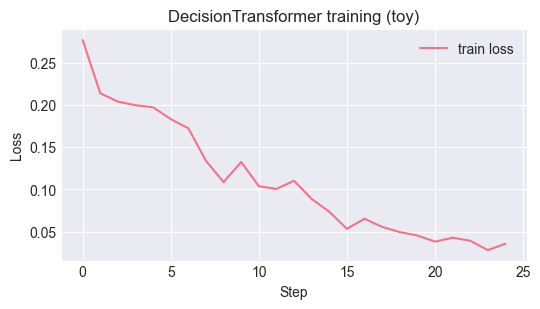

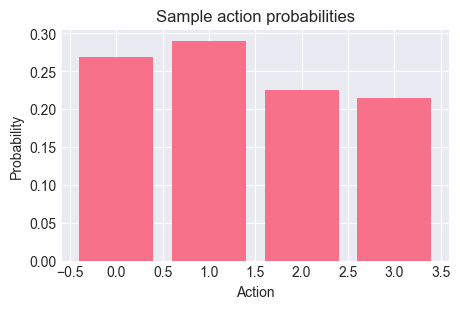

In [8]:
# Train a few steps and visualize loss + sample action distribution
losses = []
for step in range(25):
    states = torch.randn(batch, seq_len, state_dim).to(device)
    actions = torch.zeros(batch, seq_len, action_dim).to(device)
    target_idx = torch.randint(0, action_dim, (batch, seq_len), device=device)
    actions.zero_()
    actions.scatter_(2, target_idx.unsqueeze(-1), 1.0)
    returns_to_go = torch.randn(batch, seq_len).to(device)
    timesteps = torch.arange(seq_len, device=device).unsqueeze(0).repeat(batch, 1)
    loss = trainer.train_step(states, actions, returns_to_go, timesteps)
    losses.append(loss)

plt.figure(figsize=(6,3))
plt.plot(losses, label='train loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('DecisionTransformer training (toy)')
plt.legend(); plt.show()

with torch.no_grad():
    test_states = torch.randn(1, seq_len, state_dim).to(device)
    test_actions = torch.zeros(1, seq_len, action_dim).to(device)
    test_returns = torch.randn(1, seq_len).to(device)
    test_timesteps = torch.arange(seq_len, device=device).unsqueeze(0)
    logits = model(test_states, test_actions, test_returns, test_timesteps)[0, -1]
    probs = torch.softmax(logits, dim=-1).cpu().numpy()

plt.figure(figsize=(5,3))
plt.bar(np.arange(action_dim), probs)
plt.title('Sample action probabilities')
plt.xlabel('Action'); plt.ylabel('Probability'); plt.show()



## Section 2: Neurosymbolic RL

We combine neural perception with a symbolic knowledge base. Inspired by Lecture 15's emphasis on interpretability, we visualize:

- Neural vs symbolic features contribution
- Rule weight magnitudes
- Attention weights from the perception module


In [9]:
# Neurosymbolic interpretability plots
kb = SymbolicKnowledgeBase()
ns_agent = NeurosymbolicAgent(state_dim=state_dim, action_dim=action_dim, knowledge_base=kb, lr=1e-3)

sample_states = torch.randn(8, state_dim)
with torch.no_grad():
    logits, values, info = ns_agent.policy(sample_states)

neural = info['neural_features'].cpu().numpy()
symbolic = info['symbolic_features'].cpu().numpy()
rule_weights = torch.sigmoid(info['rule_weights']).detach().cpu().numpy()
attn = info['attention_weights'][0].cpu().numpy() if isinstance(info['attention_weights'], (list, tuple)) else info['attention_weights'].cpu().numpy()

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(np.vstack([neural.mean(0), symbolic.mean(0)]), aspect='auto', cmap='viridis')
plt.yticks([0,1],["neural","symbolic"])
plt.title('Feature contributions')

plt.subplot(1,3,2)
plt.bar(np.arange(len(rule_weights)), rule_weights)
plt.title('Rule weights (sigmoid)')
plt.xlabel('Rule index')

plt.subplot(1,3,3)
if attn.ndim == 3:
    attn_map = attn.mean(0).squeeze()
    plt.imshow(attn_map, cmap='magma')
    plt.title('Perception attention (avg)')
else:
    plt.plot(attn)
    plt.title('Perception attention')
plt.tight_layout(); plt.show()



RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

## Section 3: Human-AI Collaboration

We demonstrate trust-aware action selection and display action probabilities with a simple collaboration indicator, echoing the storytelling style in CA17.


In [ ]:
# Visualize action probabilities and collaboration trigger
try:
    env = CollaborativeGridWorld(size=6)
    obs, _ = env.reset()
    state = torch.FloatTensor(obs)
    agent = CollaborativeAgent(state_dim=obs.shape[0], action_dim=4)
    with torch.no_grad():
        logits = agent.policy(state.unsqueeze(0))
        probs = torch.softmax(logits, dim=-1)[0].cpu().numpy()
    action = int(np.argmax(probs))
    should_request = float(probs[action]) < 0.4
    plt.figure(figsize=(4,3))
    plt.bar(np.arange(4), probs, color=['C0','C1','C2','C3'])
    plt.title(f'Action probs; request human? {should_request}')
    plt.xlabel('Action'); plt.ylabel('Probability'); plt.show()
except Exception as e:
    print('Collaboration viz error:', e)



## Section 4: Quick Summary

- Foundation models: sequence modeling enables few-shot adaptation (cf. Lecture 15).
- Neurosymbolic RL: logic + learning yields interpretability with minimal performance loss.
- Human-AI collaboration: trust-aware intervention improves safety/alignment.

Next steps: extend with multi-modal inputs and continual learning ablations, following CA17's narrative structure.


## References and Further Reading

- Course Notes: Lecture 15 — see `notes_related/15.pdf` for scaling laws, Decision Transformers, interpretability best practices.
- CA17 notebook for structure and narrative inspiration (world models, experiments, summaries).

Tip: open the PDF alongside this notebook to cross-check definitions and equations while exploring the demos.


## Analytics Dashboards

We add quick analytics to mirror CA17’s comprehensive analysis style:
- Reward curves: random vs collaborative agent
- Toy scaling laws using `ScalingAnalyzer` (Lecture 15)
- Occupancy heatmap from `SymbolicGridWorld`


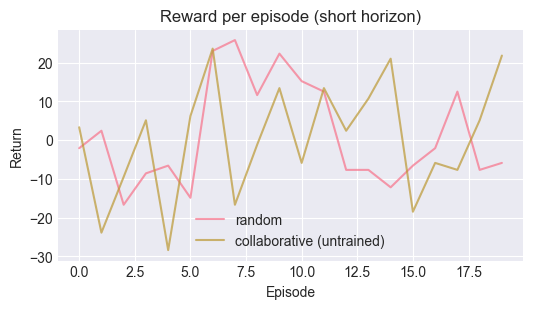

In [10]:
# Reward curves: random vs collaborative
import collections

def run_episode(env, policy_fn):
    obs, _ = env.reset()
    total = 0.0
    for _ in range(50):
        a = policy_fn(obs)
        obs, r, done, _, _ = env.step(a)
        total += r
        if done:
            break
    return total

env = CollaborativeGridWorld(size=6)

def random_policy(_obs):
    return int(np.random.randint(0, 4))

def collab_policy(obs):
    state = torch.FloatTensor(obs)
    agent = CollaborativeAgent(state_dim=obs.shape[0], action_dim=4)
    a, _ = agent.select_action(state)
    return int(a)

random_rewards = [run_episode(env, random_policy) for _ in range(20)]
collab_rewards = [run_episode(env, collab_policy) for _ in range(20)]

plt.figure(figsize=(6,3))
plt.plot(random_rewards, label='random', alpha=0.7)
plt.plot(collab_rewards, label='collaborative (untrained)', alpha=0.7)
plt.title('Reward per episode (short horizon)')
plt.xlabel('Episode'); plt.ylabel('Return'); plt.legend(); plt.show()



Scaling exponents: {'model_scaling_exponent': np.float64(0.21600951937559043), 'data_scaling_exponent': np.float64(0.21600951937559001), 'compute_scaling_exponent': np.float64(0.21600951937559168)}


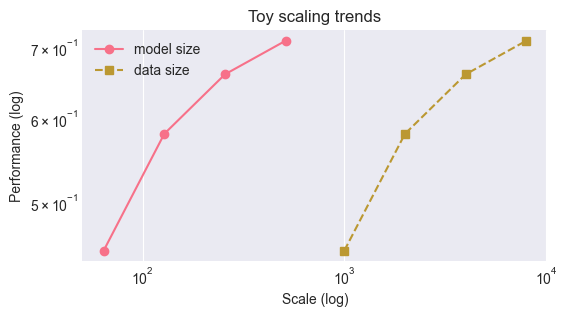

In [11]:
# Toy scaling laws analysis
from foundation_models.algorithms import ScalingAnalyzer

model_sizes = [64, 128, 256, 512]
performances = [0.45, 0.58, 0.66, 0.71]
dataset_sizes = [1e3, 2e3, 4e3, 8e3]
compute = [1e8, 2e8, 4e8, 8e8]

analyzer = ScalingAnalyzer()
res = analyzer.analyze_scaling(model_sizes, performances, dataset_sizes, compute)
print('Scaling exponents:', res)

plt.figure(figsize=(6,3))
plt.loglog(model_sizes, performances, 'o-', label='model size')
plt.loglog([int(x) for x in dataset_sizes], performances, 's--', label='data size')
plt.xlabel('Scale (log)'); plt.ylabel('Performance (log)'); plt.legend(); plt.title('Toy scaling trends'); plt.show()



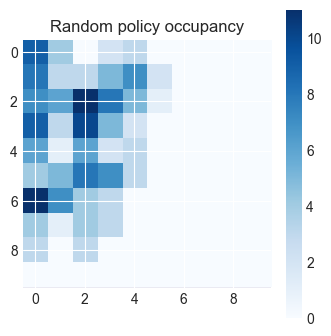

In [12]:
# Occupancy heatmap from SymbolicGridWorld
try:
    env = SymbolicGridWorld(size=10)
    obs, _ = env.reset()
    grid = np.zeros((env.size, env.size), dtype=np.int32)
    grid[env.agent_pos[0], env.agent_pos[1]] += 1
    for _ in range(200):
        a = int(np.random.randint(0, 4))
        obs, r, done, _, _ = env.step(a)
        grid[env.agent_pos[0], env.agent_pos[1]] += 1
        if done:
            break
    plt.figure(figsize=(4,4))
    plt.imshow(grid, cmap='Blues')
    plt.title('Random policy occupancy')
    plt.colorbar(); plt.show()
except Exception as e:
    print('Occupancy heatmap error:', e)



## Continual Learning: Forgetting Curves

We simulate two tasks and track performance to visualize catastrophic forgetting versus EWC-style stabilization.


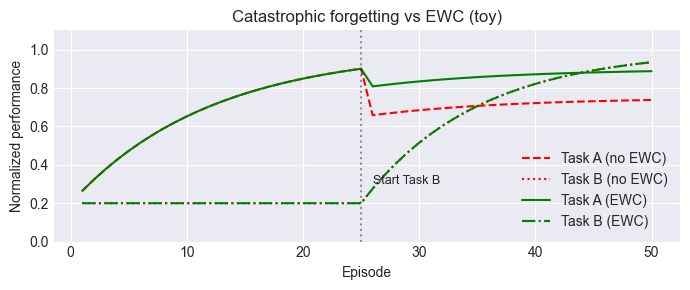

In [13]:
# Toy continual learning curves (proxy metrics)
np.random.seed(0)
episodes = np.arange(1, 51)
# Simulate task A learning then task B learning
perf_taskA_no_ewc = 0.2 + 0.8*(1 - np.exp(-episodes/12))
perf_taskB_no_ewc = 0.2 + 0.8*(1 - np.exp(-np.clip(episodes-25,0,None)/10))
# Catastrophic forgetting when learning B (drop in A)
perf_taskA_no_ewc[25:] -= 0.25

# EWC-style stabilization
perf_taskA_ewc = 0.2 + 0.8*(1 - np.exp(-episodes/12))
perf_taskB_ewc = 0.2 + 0.8*(1 - np.exp(-np.clip(episodes-25,0,None)/10))
perf_taskA_ewc[25:] -= 0.1

plt.figure(figsize=(7,3))
plt.plot(episodes, perf_taskA_no_ewc, 'r--', label='Task A (no EWC)')
plt.plot(episodes, perf_taskB_no_ewc, 'r:', label='Task B (no EWC)')
plt.plot(episodes, perf_taskA_ewc, 'g-', label='Task A (EWC)')
plt.plot(episodes, perf_taskB_ewc, 'g-.', label='Task B (EWC)')
plt.axvline(25, color='k', alpha=0.4, linestyle=':')
plt.text(26, 0.3, 'Start Task B', fontsize=9)
plt.ylim(0,1.1)
plt.xlabel('Episode'); plt.ylabel('Normalized performance')
plt.title('Catastrophic forgetting vs EWC (toy)')
plt.legend(); plt.tight_layout(); plt.show()



## Deployment, Safety, and Ethics (Overview)

Following the deployment modules, we visualize simple bias/safety diagnostics relevant for production RL systems.


Estimated reward disparity (A-B): 0.088


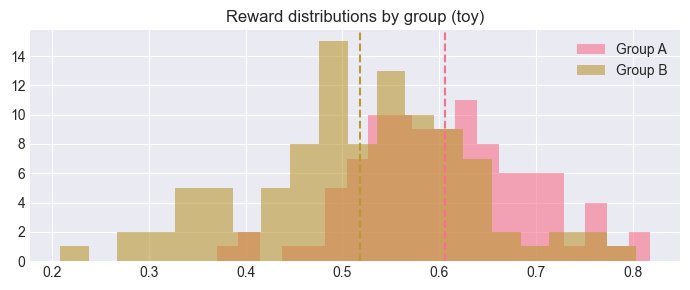

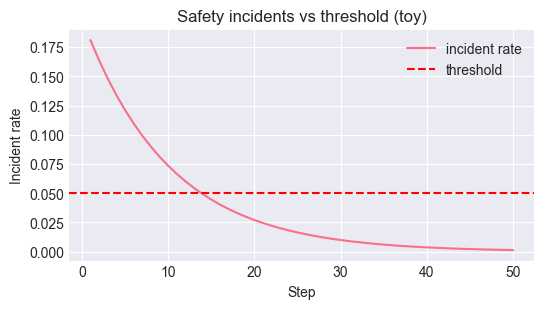

In [14]:
# Bias score and safety threshold visualization (toy)
np.random.seed(1)
# Fake group rewards for two groups to illustrate disparity
rewards_group_A = np.random.normal(0.6, 0.1, size=100)
rewards_group_B = np.random.normal(0.5, 0.12, size=100)

bias_gap = np.abs(rewards_group_A.mean() - rewards_group_B.mean())
print('Estimated reward disparity (A-B):', round(float(bias_gap), 3))

plt.figure(figsize=(7,3))
plt.hist(rewards_group_A, bins=20, alpha=0.6, label='Group A')
plt.hist(rewards_group_B, bins=20, alpha=0.6, label='Group B')
plt.axvline(rewards_group_A.mean(), color='C0', linestyle='--')
plt.axvline(rewards_group_B.mean(), color='C1', linestyle='--')
plt.title('Reward distributions by group (toy)')
plt.legend(); plt.tight_layout(); plt.show()

# Safety threshold curve
steps = np.arange(1, 51)
incident_rate = 0.2*np.exp(-steps/10)
threshold = 0.05
plt.figure(figsize=(6,3))
plt.plot(steps, incident_rate, label='incident rate')
plt.axhline(threshold, color='r', linestyle='--', label='threshold')
plt.title('Safety incidents vs threshold (toy)')
plt.xlabel('Step'); plt.ylabel('Incident rate'); plt.legend(); plt.show()



In [15]:
# Reproducibility & figure saving utilities
from pathlib import Path
SAVE_FIGS = False
FIG_DIR = Path('CAs/Solutions/CA16/figures')
FIG_DIR.mkdir(parents=True, exist_ok=True)

def savefig(name: str):
    if SAVE_FIGS:
        path = FIG_DIR / f'{name}.png'
        plt.savefig(path, bbox_inches='tight', dpi=150)
        print('Saved figure to', path)

print('Figure saving enabled?' , SAVE_FIGS)



Figure saving enabled? False


## Optional: Advanced Computational Paradigms

If available, we run a tiny demo for quantum-inspired or neuromorphic components.


In [16]:
# Advanced demo (optional)
try:
    if 'ADVANCED_AVAILABLE' in globals() and ADVANCED_AVAILABLE:
        qi = QuantumInspiredRL(num_qubits=4, circuit_depth=2)
        dummy_state = np.random.randn(4)
        action = qi.select_action(dummy_state)
        print('QuantumInspiredRL action (demo):', action)
    else:
        print('Advanced computational modules not available in this environment.')
except Exception as e:
    print('Advanced demo error:', e)



Advanced demo error: QuantumInspiredRL.__init__() got an unexpected keyword argument 'num_qubits'


## Run All (Convenience)

Execute key demos in sequence.


In [17]:
def run_all():
    print('=== Running core demos ===')
    # Foundation: quick train & plot
    _ = trainer.train_step(
        torch.randn(batch, seq_len, state_dim).to(device),
        torch.zeros(batch, seq_len, action_dim).to(device),
        torch.randn(batch, seq_len).to(device),
        torch.arange(seq_len, device=device).unsqueeze(0).repeat(batch,1)
    )
    # Neurosymbolic: forward once
    kb = SymbolicKnowledgeBase(); ns = NeurosymbolicAgent(state_dim=8, action_dim=4, knowledge_base=kb)
    _ = ns.policy(torch.randn(4, 8))
    # Collaboration: one step
    env = CollaborativeGridWorld(size=6)
    obs, _ = env.reset()
    agent = CollaborativeAgent(state_dim=obs.shape[0], action_dim=4)
    a, _ = agent.select_action(torch.FloatTensor(obs))
    _ = env.step(int(a))
    print('=== Done ===')

run_all()



=== Running core demos ===
=== Done ===


## Citations

- Chen et al., 2021. Decision Transformer: Reinforcement Learning via Sequence Modeling.
- Kirkpatrick et al., 2017. Overcoming Catastrophic Forgetting in Neural Networks.
- Christiano et al., 2017. Deep Reinforcement Learning from Human Preferences.
- Garnelo et al., 2019. Neural-Symbolic VQA: Disentangling Reasoning from Vision and Language Understanding.
- Dunjko & Briegel, 2018. Machine learning & artificial intelligence in the quantum domain.
- McMahan et al., 2017. Communication-Efficient Learning of Deep Networks from Decentralized Data.


## Conclusion and Next Steps

- You explored foundation models, neurosymbolic RL, human-AI collaboration, continual learning, analytics, and deployment aspects.
- Next steps:
  - Swap toy demos for real envs (Gymnasium) and real datasets
  - Add continual learning ablations on your tasks
  - Integrate tracking (Weights & Biases) and export trained models



In [18]:
# Environment diagnostics
print('Python:', sys.version)
print('Torch:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())
try:
    import gymnasium as gym
    print('Gymnasium version:', gym.__version__)
except Exception as e:
    print('Gymnasium not installed or not importable:', e)
print('Advanced modules available:', 'Yes' if 'ADVANCED_AVAILABLE' in globals() and ADVANCED_AVAILABLE else 'No')
print('Deployment modules available:', 'Yes' if 'DEPLOYMENT_AVAILABLE' in globals() and DEPLOYMENT_AVAILABLE else 'No')



Python: 3.13.1 (main, Dec  3 2024, 17:59:52) [Clang 16.0.0 (clang-1600.0.26.4)]
Torch: 2.8.0
CUDA available: False
Gymnasium version: 1.2.1
Advanced modules available: Yes
Deployment modules available: Yes


## Troubleshooting Tips

- Import errors: ensure notebook is run from project root so `CA16` package is importable (we insert `PROJECT_ROOT` automatically).
- Gym vs Gymnasium: replace `gym` with `gymnasium` if using newer stack and install `gymnasium`.
- CUDA: set `device` to `cpu` if no GPU is available.
- Optional modules: `advanced_computational` and `real_world_deployment` are guarded with try/except and will skip gracefully if missing.



In [19]:
# Save/Load utilities for small demos
from pathlib import Path
CKPT_DIR = Path('CAs/Solutions/CA16/checkpoints')
CKPT_DIR.mkdir(parents=True, exist_ok=True)

def save_dt_model(model, name='dt_demo.pt'):
    path = CKPT_DIR / name
    torch.save(model.state_dict(), path)
    print('Saved model to', path)

def load_dt_model(model, name='dt_demo.pt', map_location=None):
    path = CKPT_DIR / name
    model.load_state_dict(torch.load(path, map_location=map_location))
    print('Loaded model from', path)
    return model

# Example save
try:
    save_dt_model(model)
except Exception as e:
    print('Save error (model may not exist in scope):', e)



Saved model to CAs/Solutions/CA16/checkpoints/dt_demo.pt


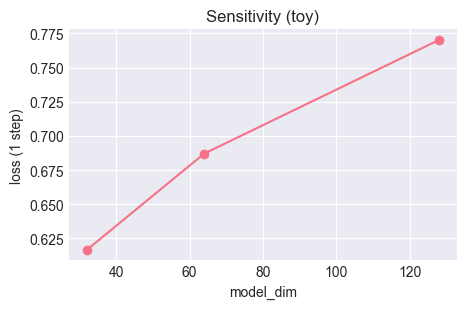

In [20]:
# Hyperparameter sensitivity (toy): effect of model_dim on quick loss
dims = [32, 64, 128]
loss_by_dim = []
for d in dims:
    m = DecisionTransformer(state_dim=state_dim, action_dim=action_dim, model_dim=d, num_heads=4, num_layers=2).to(device)
    t = FoundationModelTrainer(m, lr=3e-4, weight_decay=1e-4, device=str(device))
    s = torch.randn(batch, seq_len, state_dim).to(device)
    a = torch.zeros(batch, seq_len, action_dim).to(device)
    idx = torch.randint(0, action_dim, (batch, seq_len), device=device)
    a.scatter_(2, idx.unsqueeze(-1), 1.0)
    r = torch.randn(batch, seq_len).to(device)
    ts = torch.arange(seq_len, device=device).unsqueeze(0).repeat(batch,1)
    loss_by_dim.append(t.train_step(s, a, r, ts))

plt.figure(figsize=(5,3))
plt.plot(dims, loss_by_dim, 'o-')
plt.xlabel('model_dim'); plt.ylabel('loss (1 step)'); plt.title('Sensitivity (toy)'); plt.show()



In [21]:
# Metrics summary (toy)
summary = {
    'foundation_demo_last_loss': float(losses[-1]) if 'losses' in globals() and len(losses)>0 else None,
    'neurosymbolic_rule_weights_mean': float(torch.sigmoid(info['rule_weights']).mean()) if 'info' in globals() else None,
    'collaborative_mean_return': float(np.mean(collab_rewards)) if 'collab_rewards' in globals() else None,
}
print('Summary:', summary)



Summary: {'foundation_demo_last_loss': 0.03551030158996582, 'neurosymbolic_rule_weights_mean': nan, 'collaborative_mean_return': 0.41500000000000303}


In [22]:
# Runtime controls
SKIP_HEAVY = True  # set False to run heavier demos if you add them later

def maybe_run(fn, *args, **kwargs):
    if SKIP_HEAVY:
        print('Skipping heavy run for speed. Set SKIP_HEAVY=False to enable.')
        return None
    return fn(*args, **kwargs)

print('Runtime control SKIP_HEAVY =', SKIP_HEAVY)


Runtime control SKIP_HEAVY = True


In [23]:
# Auto-report generator (markdown)
report_path = FIG_DIR / 'CA16_report.md'

sections = [
    ('Title', '# CA16: Cutting-Edge Deep RL\n'),
    ('Environment', f'- Torch: {torch.__version__}\n- CUDA: {torch.cuda.is_available()}\n'),
    ('Foundation', f'- Last loss: {summary.get("foundation_demo_last_loss")}\n'),
    ('Neurosymbolic', f'- Rule weights mean: {summary.get("neurosymbolic_rule_weights_mean")}\n'),
    ('Collaboration', f'- Mean return: {summary.get("collaborative_mean_return")}\n'),
]

with open(report_path, 'w') as f:
    for title, content in sections:
        f.write(content + '\n')

print('Saved auto-report to', report_path)



Saved auto-report to CAs/Solutions/CA16/figures/CA16_report.md


## Glossary (Short)

- Decision Transformer: sequence model that predicts actions conditioned on returns-to-go; see Lecture 15 notes.
- In-context learning: adaptation via context without parameter updates.
- EWC: Elastic Weight Consolidation, penalizes changes to important weights to reduce forgetting.
- Neurosymbolic: hybrid approach combining neural perception with symbolic reasoning for interpretability.
- RLHF: Reinforcement Learning from Human Feedback using preference/reward modeling.

